In [41]:
pip install -- arrow

     |████████████████████████████████| 51kB 762kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --user pandas==1.0.3

  Using cached https://files.pythonhosted.org/packages/ad/1e/96282ff3db30befbbf8012ea69ecb0adc5e1064ef38e912bb8a3e4cfbccf/pandas-1.0.3-cp37-cp37m-macosx_10_9_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install windrose

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install plotly

     |████████████████████████████████| 13.2MB 6.3MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=13db6a8304ab45a753896a8d2de155948c84a17d733576ffcd892a89c1cb9ae2
  Stored in directory: /Users/nura/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


Please enter your username: Player
Select an option # Surf Location:
1) Ballina
2) Bermagui
3) Botany Bay
4) Broughton I.
5) Brunswick Heads
6) Camden Haven
7) Camp Cove
8) Coffs Harbour
9) Crookhaven Heads
10) Crowdy Head
11) Dangar I.
12) Eden
13) Ettalong
14) Evans Head
15) Forster
16) Gosford
17) Harrington Inlet
18) Huskisson
19) Jervis Bay
20) Kingscliff
21) Ku-Ring-Gai Y.C.
22) Lord Howe Island
23) Moruya
24) Newcastle
25) Nw Solitary I.
26) Patonga
27) Port Hacking
28) Port Kembla
29) Port Macquarie
30) Port Stephens
31) Princess Jetty
32) Sand Pt (Pittwater)
33) South West Rocks
34) Swansea
35) Sydney (Fort Denison)
36) Tweed Heads
37) Ulladulla Harbour
38) Yamba
39) Altona
40) Apollo Bay
41) Barracouta Platform
42) Barwon Heads
43) Bouchier Channel
44) Corio Bay
45) Cowes Jetty
46) Elizabeth Island
47) Flinders Jetty
48) Gabo I.
49) Geelong
50) Hovell Pile
51) Lakes Entrance (Outer)
52) Lorne
53) Melbourne (Williamstown)
54) Mornington
55) Port Fairy
56) Point Hicks
57) Point

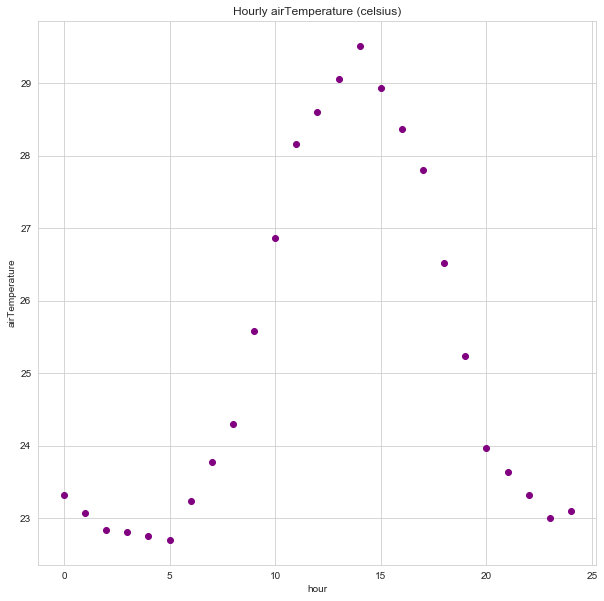

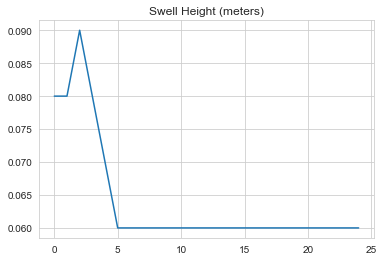

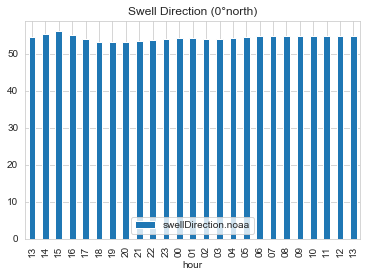

<Figure size 432x288 with 0 Axes>

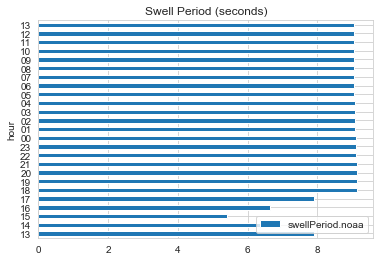

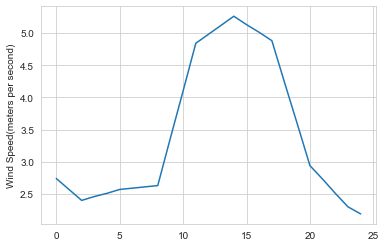

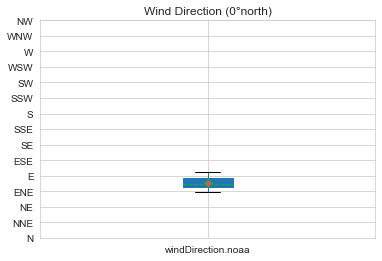

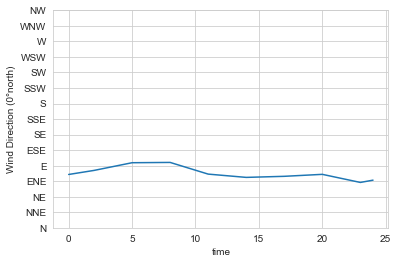

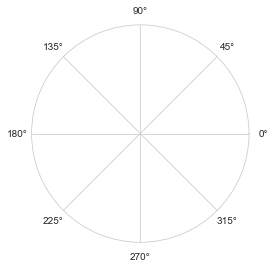

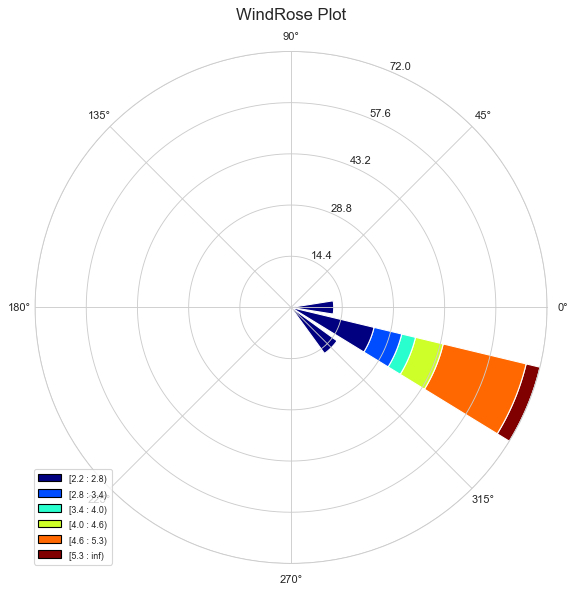

<Figure size 432x288 with 0 Axes>

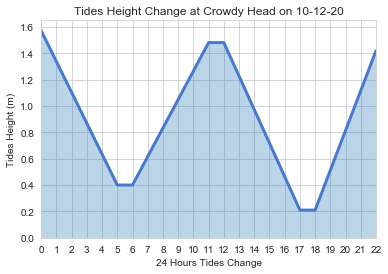

In [5]:
# pip install -- arrow
# pip install --user pandas==1.0.3
# pip install windrose
import numpy as np
import pandas as pd
import json
import csv
from tides import tideScraper, tideCalculator
from pandas.io.json import json_normalize
import arrow ##*****************need to update to install package.
import requests
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

'''
data = []
with open('location_json_output.json','r') as fh:#json file in multi line format
    for line in fh:
        data.append(json.loads(line))

    
# the json file where the output must be stored  
out_file = open("myfile.json", "w")  
json.dump(data, out_file, indent = 6)  
out_file.close()  

#convert to CSV
#df = pd.read_json(r'myfile.json')
#df.to_csv(r'D:\CMU\Python\assignment\location2.csv', index = None)
'''
def selectFromDict(options, name):
    try:
        index = 0
        indexValidList = []
        print('Select an option # ' + name + ':')
        for optionName in options:
            index = index + 1
            indexValidList.extend([options[optionName]])
            print(str(index) + ') ' + optionName)
        inputValid = False
        
        while not inputValid:
            inputRaw = input(name + ': ')   
            #if valid number
            if inputRaw.isnumeric() and (int(inputRaw) - 1) > -1 and (int(inputRaw) - 1) < len(indexValidList) :
                inputNo = int(inputRaw) - 1
                selected = indexValidList[inputNo]
                print('Selected ' +  name + ': ' + selected)
                inputValid = True
                break
            else:
                print('Please select a valid ' + name + ' number')

        return selected
    except:
        print('Error Please start again')
    

score = {}
score['Poor 1/10'] = '1'
score['Somewhat poor 2/10'] = '2'
score['Just surfable 3/10'] = '3'
score['a bit of fun 4/10'] = '4'
score['Average 5/10'] = '5'
score['above average 6/10'] = '6'
score['Enjoyable 7/10'] = '7'
score['Memorable 8/10'] = '8'
score['Epic 9/10'] = '9'
score['All time 10/10'] = '10'

'''
df1 = pd.read_csv(r'merged_data.csv')
#print(df1)
#build locations from merged_data
#to build dict of coast spots
listloc1 = df1['coastSpot'].to_list()
listloc2 = df1['coastSpot'].to_list()

print(df1.loc[: , ['coastSpot']])
'''

#read first approx 20 locations from clean tides csv - for speed of running
#df10 = pd.read_csv(r'clean_tides_utc.csv', nrows=1220)
df10 = pd.read_csv(r'location.csv', nrows=1220)


#to build dict of coast spots
listloc1 = df10['location_name'].to_list()
#listloc2 = df10['location'].to_list()

#print(listloc1)

res = {} 
for key in listloc1: 
    res[key] = key #will add only if new.
#print(res)
        
'''
loc = {}
loc['Glenelg'] = 'Glenelg'
loc['Middleton'] = 'Middleton'
loc['Goolwa'] = 'Goolwa'
loc['Brettys Right'] = 'Brettys Right'
loc['Tunkalilla'] = 'Tunkalilla'
loc['Waits'] = 'Waits'
loc['Parsons'] = 'Parsons'
loc['Middleton Point'] = 'Middleton Point'
loc['Day street'] = 'Day street'
loc['Key holes'] = 'Key holes'
loc['Burleigh Heads'] = 'Burleigh Heads'
'''
#user name
userName = input("Please enter your username: ")

# user select a location
loc = selectFromDict(res, 'Surf Location')

# user selects a surf score
score = selectFromDict(score, 'Surf Score')

from datetime import datetime
#capture data and time
now = datetime.now()

print(userName + ' your surf report on: ' + now.strftime("%Y-%m-%d %H:%M:%S") + ' at ' + loc + ' you gave a score of: ' + score)

##############################  Parameters  ###################################
loc = loc
# long = df10.loc[df10['location_name'] == loc]['Long']
long = df10.loc[df10['location_name'] == loc]['Long'].values[0]
# lat = df10.loc[df10['location_name'] == loc]['Lat']
lat = df10.loc[df10['location_name'] == loc]['Lat'].values[0]
state = df10.loc[df10['location_name'] == loc]['state'].values[0]
date = now.strftime('%d-%m-%y')

##############################  Parameters  ###################################
# Weather Data
# Get first hour of today
start = arrow.now().floor('day')

# Get last hour of today
end = arrow.now().ceil('day')

response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': lat,
    'lng': long,
      ######## secondary swell ????
    'params': ','.join(['airTemperature','swellDirection','swellHeight','swellPeriod','secondarySwellDirection','secondarySwellHeight','secondarySwellPeriod','windDirection','windSpeed']),
    'start': start.to('UTC').timestamp,  # Convert to UTC timestamp
    'end': end.to('UTC').timestamp  # Convert to UTC timestamp
  },
  headers={
    'Authorization': '0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002'
  }
)

# key3: 0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002
# key2: 684468aa-3ab9-11eb-9d20-0242ac130002-68446922-3ab9-11eb-9d20-0242ac130002
# key1: '1eb723a6-2805-11eb-8ea5-0242ac130002-1eb7248c-2805-11eb-8ea5-0242ac130002'

# Do something with response data.
weather_data = response.json()


weather_meta = weather_data['meta']
weather_hours = weather_data['hours']

weather_meta
weather_hours
#len(weather_hours)

pd.json_normalize(weather_hours)
df_weather = pd.json_normalize(weather_hours)

#print('df_weather')
#print(df_weather)

#### extremem tide
start = arrow.now().floor('day')
end = arrow.now().shift(days=1).floor('day')

response = requests.get(
  'https://api.stormglass.io/v2/tide/extremes/point',
  params={
    'lat': lat,
    'lng': long,
    'start': start.to('UTC').timestamp,  # Convert to UTC timestamp
    'end': end.to('UTC').timestamp,  # Convert to UTC timestam
  },
  headers={
    'Authorization': '0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002'
  }
)

# key3: 0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002
# key2: 684468aa-3ab9-11eb-9d20-0242ac130002-68446922-3ab9-11eb-9d20-0242ac130002
# key1: '1eb723a6-2805-11eb-8ea5-0242ac130002-1eb7248c-2805-11eb-8ea5-0242ac130002'

# Do something with response data.
extremeTide_data_all = response.json()

#extremeTide_data_all

extremeTide_data = extremeTide_data_all['data']
extremeTide_meta = extremeTide_data_all['meta']

df_extremeTide = pd.json_normalize(extremeTide_data)
df_extremeTide.head()

df_extremeTide_meta = pd.json_normalize(extremeTide_meta)
df_extremeTide_meta

## retrieve seal level data
start = arrow.now().floor('day')
end = arrow.now().shift(days=1).floor('day')

response = requests.get(
  'https://api.stormglass.io/v2/tide/sea-level/point',
  params={
    'lat': lat,
    'lng': long,
    'start': start.to('UTC').timestamp,  # Convert to UTC timestamp
    'end': end.to('UTC').timestamp,  # Convert to UTC timestam
  },
  headers={
    'Authorization': '0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002'
  }
)

# key3: 0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002
# key2: 684468aa-3ab9-11eb-9d20-0242ac130002-68446922-3ab9-11eb-9d20-0242ac130002
# key1: '1eb723a6-2805-11eb-8ea5-0242ac130002-1eb7248c-2805-11eb-8ea5-0242ac130002'

# Do something with response data.
seaLevel_data_all = response.json()
seaLevel_data_all


seaLevel_data = seaLevel_data_all['data']
seaLevel_meta = seaLevel_data_all['meta']

df_seaLevel = pd.json_normalize(seaLevel_data)
df_seaLevel

df_seaLevel_meta = pd.json_normalize(seaLevel_meta)
df_seaLevel_meta

#Visulizations

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df_weather.index.values,
           df_weather["airTemperature.noaa"],
           color='purple')

ax.set(xlabel="hour",
       ylabel="airTemperature",
       title="Hourly airTemperature (celsius)")

plt.show()
fig.savefig('airTemperature_{loc}_{date}.png'.format(loc=loc,date=date))

df_weather
df_weather.columns

df_weather["hour"] = df_weather.time.str[11:13]

if("swellHeight.noaa" in df_weather):
    df_weather["swellHeight.noaa"].plot(title='Swell Height (meters)')
else:
    print("No available data for secondary swell for " + loc + "from stormglass API.")
    
if("swellDirection.noaa" in df_weather):
    df_weather.plot(kind='bar', y='swellDirection.noaa', x='hour', title='Swell Direction (0°north)')
    plt.show()
    plt.savefig('swellDirection_{loc}_{date}.png'.format(loc=loc,date=date))
else:
    print("No available data for swell direction for " + loc + "from stormglass API.")
    
if("swellPeriod.noaa" in df_weather):
    df_weather.plot(kind='barh', y='swellPeriod.noaa', x='hour', title='Swell Period (seconds)')
    plt.show()
    plt.savefig('swellPeriod_{loc}_{date}.png'.format(loc=loc,date=date))
else:
    print("No available data for swell period for " + loc + "from stormglass API.")
    
plt.plot(df_weather["windSpeed.noaa"])
plt.ylabel("Wind Speed(meters per second)");

#wind Direction and ??? over time of the day??

df_weather.plot.box(y='windDirection.noaa', title='Wind Direction (0°north)',
                    patch_artist=True, showmeans=True, 
                    boxprops = {'color':'black','facecolor':'#9999ff'}, 
                    flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
                    meanprops = {'marker':'D','markerfacecolor':'indianred'},
                    medianprops = {'linestyle':'--','color':'orange'})
plt.yticks([24,48,72,96,120,144,168,192,216,240,264,288,312,336,360],
           ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])
fig1 = plt.gcf()
plt.show()
fig1.savefig('WindDirection_{loc}_{date}.png'.format(loc=loc,date=date))

#wind direction
plt.plot(df_weather["windDirection.noaa"])
plt.ylabel("Wind Direction (0°north)");
plt.xlabel("time")
plt.yticks([24,48,72,96,120,144,168,192,216,240,264,288,312,336,360],
           ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])

# Fixing random state for reproducibility

# Compute areas and colors

area = 200 * 100**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(df_weather["windDirection.noaa"], df_weather["time"].str[11:13], cmap='hsv', alpha=0.75)


from windrose import WindroseAxes

# Create wind speed and direction variables
  
ax = WindroseAxes.from_ax()
ax.bar(df_weather['windDirection.noaa'], df_weather['windSpeed.noaa'], normed=True, opening=0.8, edgecolor='white')
title='WindRose Plot'
ax.set_title(title,fontsize=15,loc='center')

ax.set_legend()
 
plt.show()
fig1 = plt.gcf()
fig1.savefig('WindRose_{loc}_{date}.png'.format(loc=loc,date=date))


df_cords = df10[['location_name','Long', 'Lat']]
df_cords.head()

import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = df_cords['Long'],
        lat = df_cords['Lat'],
        text = df_cords['location_name'],
        mode = 'markers',
        marker_color = 'blue',
        ))

fig.update_layout(
        title = 'Sample locations)',
        geo_scope='world',
    )
fig.show()
fig1 = plt.gcf()
fig1.savefig('map_{loc}_{date}.png'.format(loc=loc,date=date))

############## Getting Tides Data and Plot ################3
tideScraper(loc, state, lat, long, date)
tideCalculator(loc, date)

In [6]:
%%writefile surf.py

# pip install -- arrow
# pip install --user pandas==1.0.3
# pip install windrose
# pip install tides
import numpy as np
import pandas as pd
import json
import csv
from tides import tideScraper, tideCalculator
from pandas.io.json import json_normalize
import arrow ##*****************need to update to install package.
import requests
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

'''
data = []
with open('location_json_output.json','r') as fh:#json file in multi line format
    for line in fh:
        data.append(json.loads(line))

    
# the json file where the output must be stored  
out_file = open("myfile.json", "w")  
json.dump(data, out_file, indent = 6)  
out_file.close()  

#convert to CSV
#df = pd.read_json(r'myfile.json')
#df.to_csv(r'D:\CMU\Python\assignment\location2.csv', index = None)
'''
def selectFromDict(options, name):
    try:
        index = 0
        indexValidList = []
        print('Select an option # ' + name + ':')
        for optionName in options:
            index = index + 1
            indexValidList.extend([options[optionName]])
            print(str(index) + ') ' + optionName)
        inputValid = False
        
        while not inputValid:
            inputRaw = input(name + ': ')   
            #if valid number
            if inputRaw.isnumeric() and (int(inputRaw) - 1) > -1 and (int(inputRaw) - 1) < len(indexValidList) :
                inputNo = int(inputRaw) - 1
                selected = indexValidList[inputNo]
                print('Selected ' +  name + ': ' + selected)
                inputValid = True
                break
            else:
                print('Please select a valid ' + name + ' number')

        return selected
    except:
        print('Error Please start again')
    

score = {}
score['Poor 1/10'] = '1'
score['Somewhat poor 2/10'] = '2'
score['Just surfable 3/10'] = '3'
score['a bit of fun 4/10'] = '4'
score['Average 5/10'] = '5'
score['above average 6/10'] = '6'
score['Enjoyable 7/10'] = '7'
score['Memorable 8/10'] = '8'
score['Epic 9/10'] = '9'
score['All time 10/10'] = '10'

'''
df1 = pd.read_csv(r'merged_data.csv')
#print(df1)
#build locations from merged_data
#to build dict of coast spots
listloc1 = df1['coastSpot'].to_list()
listloc2 = df1['coastSpot'].to_list()

print(df1.loc[: , ['coastSpot']])
'''

#read first approx 20 locations from clean tides csv - for speed of running
#df10 = pd.read_csv(r'clean_tides_utc.csv', nrows=1220)
df10 = pd.read_csv(r'location.csv', nrows=1220)


#to build dict of coast spots
listloc1 = df10['location_name'].to_list()
#listloc2 = df10['location'].to_list()

#print(listloc1)

res = {} 
for key in listloc1: 
    res[key] = key #will add only if new.
#print(res)
        
'''
loc = {}
loc['Glenelg'] = 'Glenelg'
loc['Middleton'] = 'Middleton'
loc['Goolwa'] = 'Goolwa'
loc['Brettys Right'] = 'Brettys Right'
loc['Tunkalilla'] = 'Tunkalilla'
loc['Waits'] = 'Waits'
loc['Parsons'] = 'Parsons'
loc['Middleton Point'] = 'Middleton Point'
loc['Day street'] = 'Day street'
loc['Key holes'] = 'Key holes'
loc['Burleigh Heads'] = 'Burleigh Heads'
'''
#user name
userName = input("Please enter your username: ")

# user select a location
loc = selectFromDict(res, 'Surf Location')

# user selects a surf score
score = selectFromDict(score, 'Surf Score')

from datetime import datetime
#capture data and time
now = datetime.now()

print(userName + ' your surf report on: ' + now.strftime("%Y-%m-%d %H:%M:%S") + ' at ' + loc + ' you gave a score of: ' + score)

##############################  Parameters  ###################################
loc = loc
# long = df10.loc[df10['location_name'] == loc]['Long']
long = df10.loc[df10['location_name'] == loc]['Long'].values[0]
# lat = df10.loc[df10['location_name'] == loc]['Lat']
lat = df10.loc[df10['location_name'] == loc]['Lat'].values[0]
state = df10.loc[df10['location_name'] == loc]['state'].values[0]
date = now.strftime('%d-%m-%y')

##############################  Parameters  ###################################
# Weather Data
# Get first hour of today
start = arrow.now().floor('day')

# Get last hour of today
end = arrow.now().ceil('day')

response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': lat,
    'lng': long,
      ######## secondary swell ????
    'params': ','.join(['airTemperature','swellDirection','swellHeight','swellPeriod','secondarySwellDirection','secondarySwellHeight','secondarySwellPeriod','windDirection','windSpeed']),
    'start': start.to('UTC').timestamp,  # Convert to UTC timestamp
    'end': end.to('UTC').timestamp  # Convert to UTC timestamp
  },
  headers={
    'Authorization': '0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002'
  }
)

# key3: 0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002
# key2: 684468aa-3ab9-11eb-9d20-0242ac130002-68446922-3ab9-11eb-9d20-0242ac130002
# key1: '1eb723a6-2805-11eb-8ea5-0242ac130002-1eb7248c-2805-11eb-8ea5-0242ac130002'

# Do something with response data.
weather_data = response.json()


weather_meta = weather_data['meta']
weather_hours = weather_data['hours']

weather_meta
weather_hours
#len(weather_hours)

pd.json_normalize(weather_hours)
df_weather = pd.json_normalize(weather_hours)

#print('df_weather')
#print(df_weather)

#### extremem tide
start = arrow.now().floor('day')
end = arrow.now().shift(days=1).floor('day')

response = requests.get(
  'https://api.stormglass.io/v2/tide/extremes/point',
  params={
    'lat': lat,
    'lng': long,
    'start': start.to('UTC').timestamp,  # Convert to UTC timestamp
    'end': end.to('UTC').timestamp,  # Convert to UTC timestam
  },
  headers={
    'Authorization': '0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002'
  }
)

# key3: 0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002
# key2: 684468aa-3ab9-11eb-9d20-0242ac130002-68446922-3ab9-11eb-9d20-0242ac130002
# key1: '1eb723a6-2805-11eb-8ea5-0242ac130002-1eb7248c-2805-11eb-8ea5-0242ac130002'

# Do something with response data.
extremeTide_data_all = response.json()

#extremeTide_data_all

extremeTide_data = extremeTide_data_all['data']
extremeTide_meta = extremeTide_data_all['meta']

df_extremeTide = pd.json_normalize(extremeTide_data)
df_extremeTide.head()

df_extremeTide_meta = pd.json_normalize(extremeTide_meta)
df_extremeTide_meta

## retrieve seal level data
start = arrow.now().floor('day')
end = arrow.now().shift(days=1).floor('day')

response = requests.get(
  'https://api.stormglass.io/v2/tide/sea-level/point',
  params={
    'lat': lat,
    'lng': long,
    'start': start.to('UTC').timestamp,  # Convert to UTC timestamp
    'end': end.to('UTC').timestamp,  # Convert to UTC timestam
  },
  headers={
    'Authorization': '0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002'
  }
)

# key3: 0fe486ac-3acf-11eb-93d6-0242ac130002-0fe4872e-3acf-11eb-93d6-0242ac130002
# key2: 684468aa-3ab9-11eb-9d20-0242ac130002-68446922-3ab9-11eb-9d20-0242ac130002
# key1: '1eb723a6-2805-11eb-8ea5-0242ac130002-1eb7248c-2805-11eb-8ea5-0242ac130002'

# Do something with response data.
seaLevel_data_all = response.json()
seaLevel_data_all


seaLevel_data = seaLevel_data_all['data']
seaLevel_meta = seaLevel_data_all['meta']

df_seaLevel = pd.json_normalize(seaLevel_data)
df_seaLevel

df_seaLevel_meta = pd.json_normalize(seaLevel_meta)
df_seaLevel_meta

#Visulizations

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df_weather.index.values,
           df_weather["airTemperature.noaa"],
           color='purple')

ax.set(xlabel="hour",
       ylabel="airTemperature",
       title="Hourly airTemperature (celsius)")

plt.show()
fig.savefig('airTemperature_{loc}_{date}.png'.format(loc=loc,date=date))

df_weather
df_weather.columns

df_weather["hour"] = df_weather.time.str[11:13]

if("swellHeight.noaa" in df_weather):
    df_weather["swellHeight.noaa"].plot(title='Swell Height (meters)')
else:
    print("No available data for secondary swell for " + loc + "from stormglass API.")
    
if("swellDirection.noaa" in df_weather):
    df_weather.plot(kind='bar', y='swellDirection.noaa', x='hour', title='Swell Direction (0°north)')
    plt.show()
    plt.savefig('swellDirection_{loc}_{date}.png'.format(loc=loc,date=date))
else:
    print("No available data for swell direction for " + loc + "from stormglass API.")
    
if("swellPeriod.noaa" in df_weather):
    df_weather.plot(kind='barh', y='swellPeriod.noaa', x='hour', title='Swell Period (seconds)')
    plt.show()
    plt.savefig('swellPeriod_{loc}_{date}.png'.format(loc=loc,date=date))
else:
    print("No available data for swell period for " + loc + "from stormglass API.")
    
plt.plot(df_weather["windSpeed.noaa"])
plt.ylabel("Wind Speed(meters per second)");

#wind Direction and ??? over time of the day??

df_weather.plot.box(y='windDirection.noaa', title='Wind Direction (0°north)',
                    patch_artist=True, showmeans=True, 
                    boxprops = {'color':'black','facecolor':'#9999ff'}, 
                    flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
                    meanprops = {'marker':'D','markerfacecolor':'indianred'},
                    medianprops = {'linestyle':'--','color':'orange'})
plt.yticks([24,48,72,96,120,144,168,192,216,240,264,288,312,336,360],
           ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])
fig1 = plt.gcf()
plt.show()
fig1.savefig('WindDirection_{loc}_{date}.png'.format(loc=loc,date=date))

#wind direction
plt.plot(df_weather["windDirection.noaa"])
plt.ylabel("Wind Direction (0°north)");
plt.xlabel("time")
plt.yticks([24,48,72,96,120,144,168,192,216,240,264,288,312,336,360],
           ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])

# Fixing random state for reproducibility

# Compute areas and colors

area = 200 * 100**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(df_weather["windDirection.noaa"], df_weather["time"].str[11:13], cmap='hsv', alpha=0.75)


from windrose import WindroseAxes

# Create wind speed and direction variables
  
ax = WindroseAxes.from_ax()
ax.bar(df_weather['windDirection.noaa'], df_weather['windSpeed.noaa'], normed=True, opening=0.8, edgecolor='white')
title='WindRose Plot'
ax.set_title(title,fontsize=15,loc='center')

ax.set_legend()
 
plt.show()
fig1 = plt.gcf()
fig1.savefig('WindRose_{loc}_{date}.png'.format(loc=loc,date=date))


df_cords = df10[['location_name','Long', 'Lat']]
df_cords.head()

import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = df_cords['Long'],
        lat = df_cords['Lat'],
        text = df_cords['location_name'],
        mode = 'markers',
        marker_color = 'blue',
        ))

fig.update_layout(
        title = 'Sample locations)',
        geo_scope='world',
    )
fig.show()
fig1 = plt.gcf()
fig1.savefig('map_{loc}_{date}.png'.format(loc=loc,date=date))

############## Getting Tides Data and Plot ################3
tideScraper(loc, state, lat, long, date)
tideCalculator(loc, date)

Overwriting surf.py
